In [19]:
import plotly.express as px
import pandas as pd
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [20]:
output_txt = "../output.txt"

In [21]:
f = open(output_txt, "r")
content = f.read()
periods = content.split("CURRENT PERIOD")[1:]

In [22]:
regex_assignment = re.compile(
    r"V(.*?)    (.*?)    (.*?)    (.*?)    (.*?)    (.*?)    (.*?)    (.*?)    (.*?)    (.*?\(.*?\))    (.*?\(.*?\))    (.*?\(.*?\))    (.*?\(.*?\))"
)

In [23]:
final_d = {}

i = 1
for p in periods:
    matches = re.findall(regex_assignment, p)
    aux = []
    for match in matches:
        d = {}
        d["P"] = i
        d["Victim"] = "V" + str(match[0])
        d["G"] = int(match[1])
        d["A"] = int(match[2])
        d["λ"] = float(match[3])
        d["Veh"] = match[5]
        d["Hos"] = match[7]
        d["App"] = float(match[8].split(" ")[0])
        d["S"] = float(match[9].split(" ")[0])
        d["F"] =float(match[-1].split(" ")[0])
        d["Dur"] = d["F"] - d["App"]
        d["Wait"] = d["S"] - d["App"]
        d["TS_S"] = match[9].split(" ")[1].strip("(").strip(")")
        d["TS_F"] = match[-1].split(" ")[1].strip("(").strip(")")
        aux.append(d)
        final_d["V" + str(match[0])] = d
    p_df = pd.DataFrame(aux)


    with pd.option_context('display.max_rows', None,'display.max_columns', None,):
        print(p_df)
        print()
    i += 1

    P Victim  G  A         λ Veh   Hos    App         S         F      Dur   
0   1     V1  3  1  5.104960  H2  MCC1  461.0   461.000   590.363  129.363  \
1   1     V2  3  3  5.104960  H1  MCC1  461.0   461.000   556.726   95.726   
2   1     V3  3  2  5.104960  H1  MCC1  461.0   556.726   622.816  161.816   
3   1     V4  3  2  5.104960  H2  MCC1  461.0   590.363   656.453  195.453   
4   1     V5  3  2  5.104960  H1  MCC1  461.0   622.816   688.646  227.646   
5   1     V6  2  2  0.895303  H2  MCC2  461.0   656.453   689.703  228.703   
6   1     V7  2  1  0.895303  H1  MCC2  461.0   688.646   733.996  272.996   
7   1     V8  2  1  0.895303  H2  MCC2  461.0   689.703   734.493  273.493   
8   1     V9  2  2  0.895303  H1  MCC2  461.0   733.996   766.686  305.686   
9   1    V10  2  2  0.895303  H2  MCC2  461.0   734.493   767.723  306.723   
10  1    V11  2  2  0.895303  H1  MCC2  461.0   766.686   799.636  338.636   
11  1    V12  2  2  0.895303  H2  MCC2  461.0   767.723   800.54

In [24]:
final_aux = []
for k in final_d:
    final_aux.append(final_d[k])
final_aux = sorted(final_aux, key=lambda d: d["S"])
final_df = pd.DataFrame.from_dict(final_aux)
with pd.option_context('display.max_rows', None,'display.max_columns', None,):
        print(final_df)
        print()

     P Victim  G  A          λ Veh   Hos     App         S         F   
0    1     V1  3  1   5.104960  H2  MCC1   461.0   461.000   590.363  \
1    1     V2  3  3   5.104960  H1  MCC1   461.0   461.000   556.726   
2    1     V3  3  2   5.104960  H1  MCC1   461.0   556.726   622.816   
3    2     V4  3  2   5.718250  H2  MCC1   461.0   590.363   761.453   
4    2     V5  3  2   5.718250  H1  MCC1   461.0   622.816   793.646   
5    3     V6  3  2   7.597970  H3  MCC1   461.0   706.000  1049.200   
6    3     V7  3  1   7.597970  H2  MCC1   461.0   761.453  1103.730   
7    3     V8  3  1   7.597970  H1  MCC1   461.0   793.646  1135.380   
8    1    V21  2  1   0.895303  H2  MCC2   461.0   929.933   974.723   
9    1    V22  2  1   0.895303  H1  MCC2   461.0   944.036   991.376   
10   1    V23  2  2   0.895303  H2  MCC2   461.0   974.723  1007.930   
11   1    V24  2  2   0.895303  H1  MCC2   461.0   991.376  1024.470   
12   1    V25  2  2   0.895303  H2  MCC2   461.0  1007.930  1040

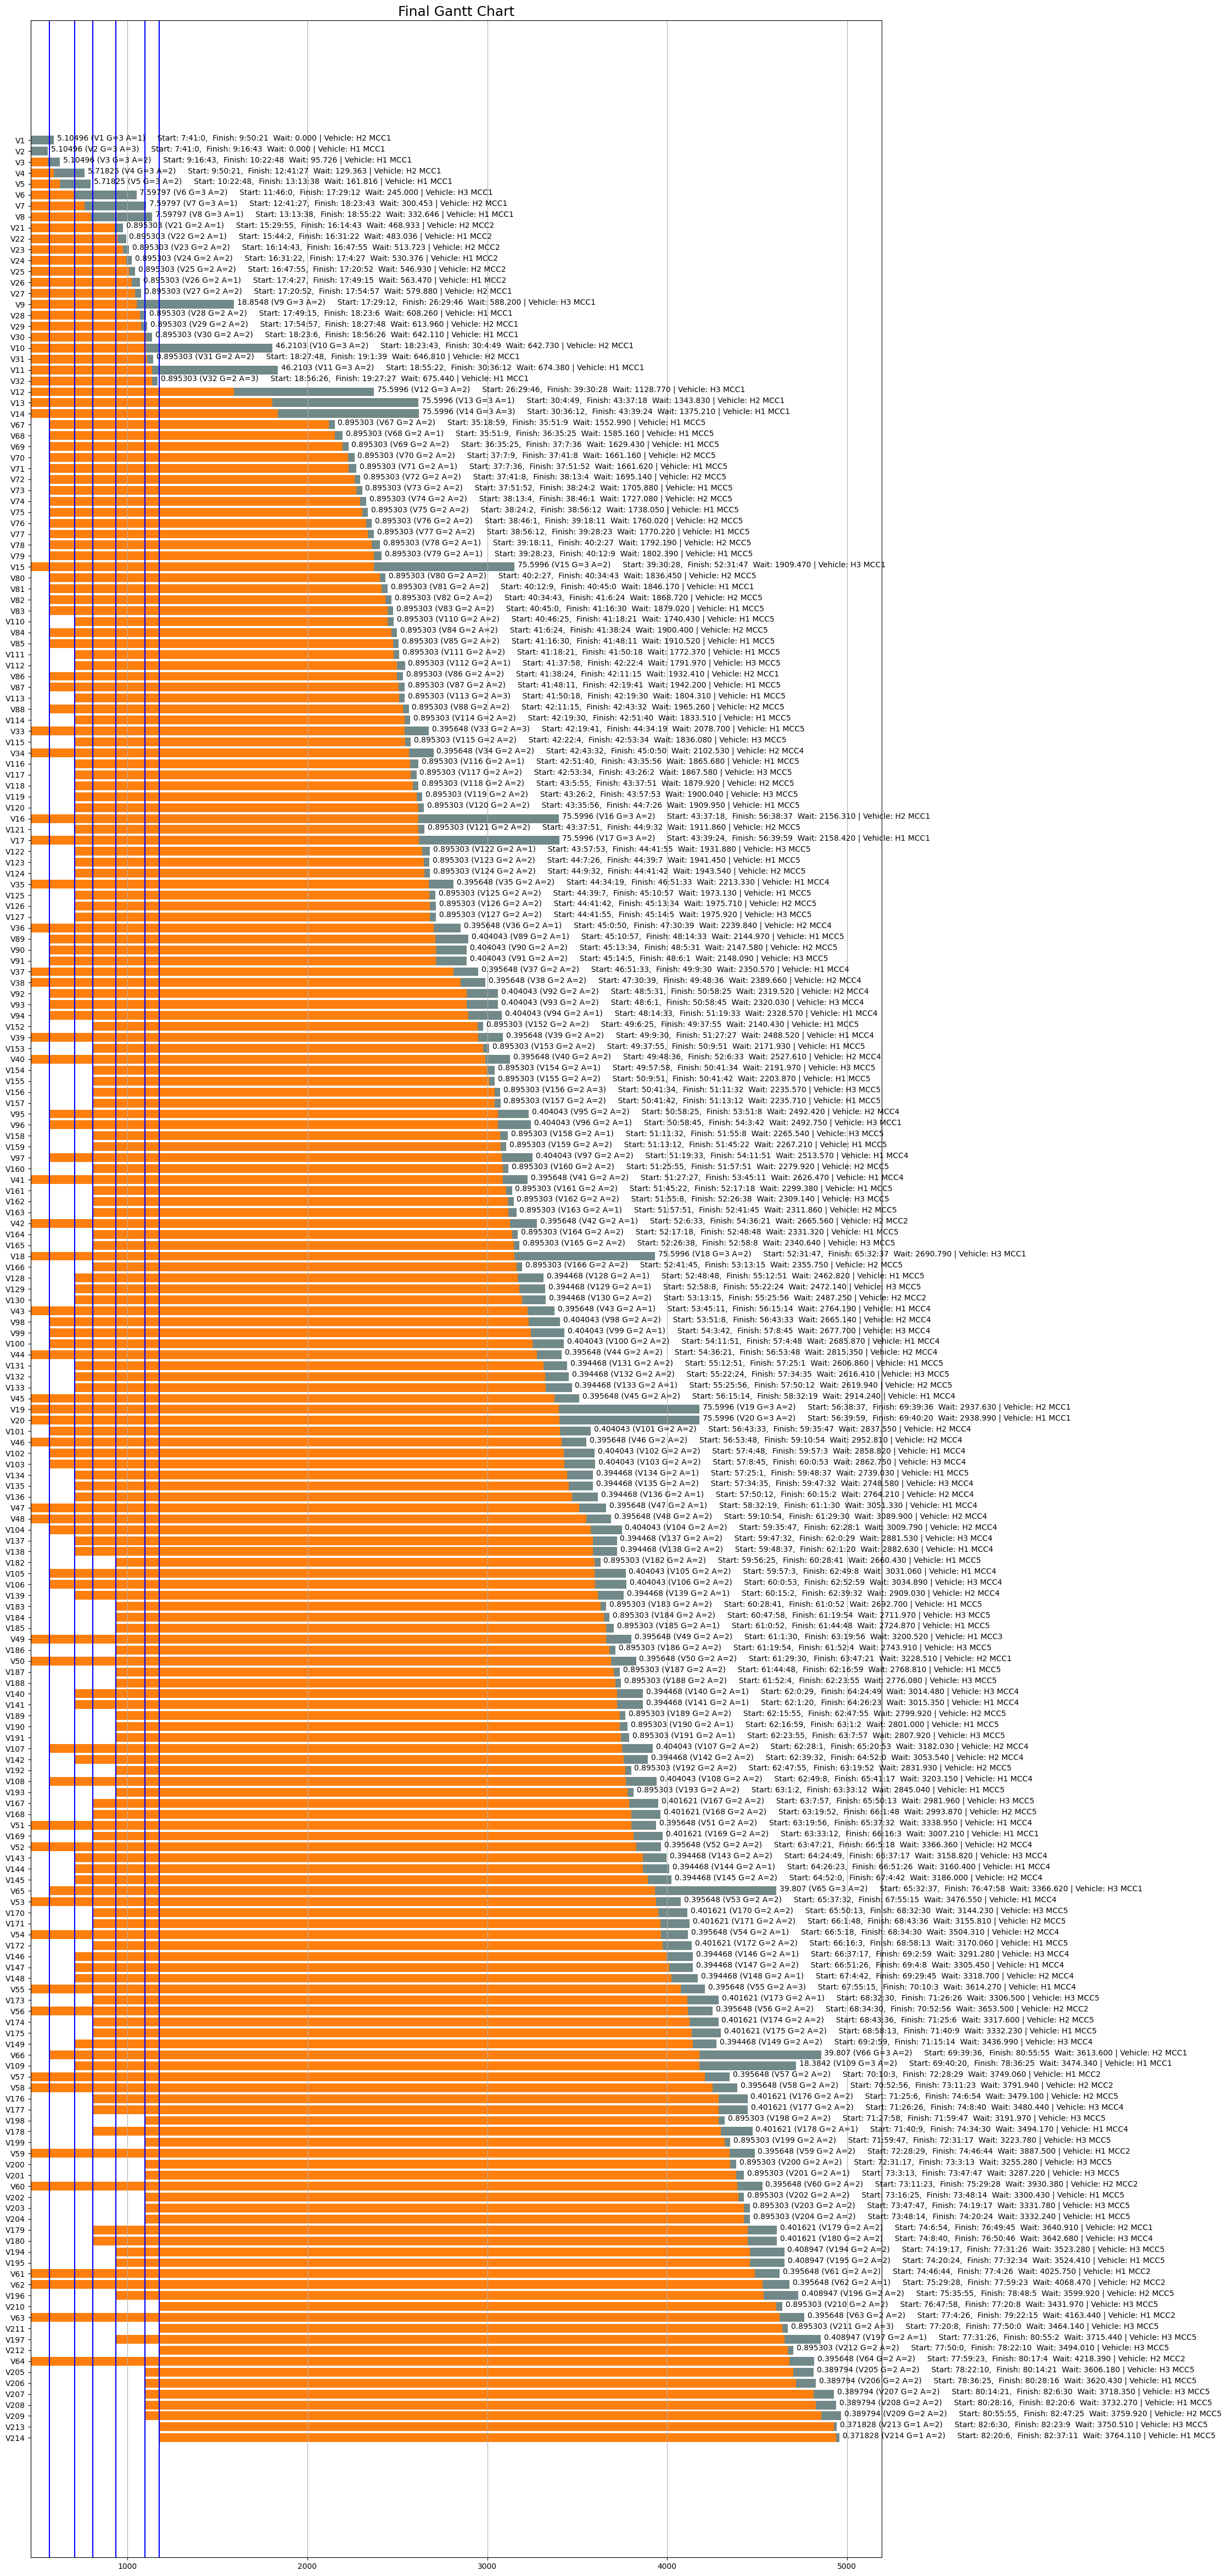

In [25]:
plt.figure(figsize=(20,60))
yticks=[i for i in range(len(final_df.Victim))]
plt.title('Final Gantt Chart', size=18)
for i in range(final_df.shape[0]):
    plt.barh(y=final_df.Victim, left=final_df.App, width=final_df.Dur, alpha= 0.4)
    plt.barh(y=final_df.Victim, left=final_df.App, width=final_df.Wait, alpha=1)
    label =  str(final_df.λ[i]) + " (" + str(final_df.Victim[i])+ " G="+ str(final_df.G[i]) + " A=" + str(final_df.A[i]) + ")" +  "     Start: " + str(final_df.TS_S[i])+ ",  Finish: " + str(final_df.TS_F[i])
    label += "  Wait: " + str("{:.3f}".format(final_df.Wait[i]))
    label += " | Vehicle: " + str(final_df.Veh[i])  +  " " + final_df.Hos[i]
    plt.text(x=final_df.F[i] + 18, y=yticks[i],s=label)

plt.axvline(x = 461, color = 'b',)
plt.axvline(x = 566, color = 'b')
plt.axvline(x = 706, color = 'b')
plt.axvline(x = 806, color = 'b')
plt.axvline(x = 936, color = 'b')
plt.axvline(x = 1096, color = 'b')
plt.axvline(x = 1176, color = 'b')
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.show()

In [26]:

f.close()